In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install accelerate -U

In [ ]:
import json

# Function to extract chords from JSON file
def extract_chords_from_json(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
        songs_data = data.get('songs', [])
        chord_sequences = {}
        for song in songs_data:
            title = song.get('title', 'Unknown')
            measures = song.get('music', {}).get('measures', [])
            chords = [chord for measure in measures for chord in measure]
            chord_sequences[title] = chords
        return chord_sequences

# Path to your JSON file in Google Drive
json_file_path = '/content/drive/My Drive/Colab Notebooks/MARG/irealPro/playlist.json'

# Extract chord sequences
chord_sequences = extract_chords_from_json(json_file_path)

print(chord_sequences)

{'9.20 Special': ['D9', 'F-6', 'D9', 'F-6', 'C', 'C7', 'B7', 'Bb7', 'A7', 'D9', 'G7', 'Ab7', 'G7', 'D9', 'F-6', 'D9', 'F-6', 'C', 'C7', 'B7', 'Bb7', 'A7', 'D9', 'G7', 'C6', 'C7', 'C7', 'F6', 'F6', 'D7', 'D7', 'G7', 'G7', 'D9', 'F-6', 'D9', 'F-6', 'C', 'C7', 'B7', 'Bb7', 'A7', 'D9', 'G7', 'C6'], '26-2': ['F^7', 'Ab7', 'Db^7', 'E7', 'A^7', 'C7', 'C-7', 'F7', 'Bb^7', 'Db7', 'Gb^7', 'A7', 'D-7', 'G7', 'G-7', 'C7', 'F^7', 'Ab7', 'Db^7', 'E7', 'A^7', 'C7', 'C-7', 'F7', 'Bb^7', 'Ab7', 'Db^7', 'E7', 'A^7', 'C7', 'F^7', 'C-7', 'F7', 'E-7', 'A7', 'D^7', 'F7', 'Bb^7', 'Eb-7', 'Ab7', 'Db^7', 'G-7', 'C7', 'F^7', 'Ab7', 'Db^7', 'E7', 'A^7', 'C7', 'C-7', 'F7', 'Bb^7', 'Ab7', 'Db^7', 'E7', 'A^7', 'C7', 'F^7'], '52nd Street Theme': ['C', 'A-7', 'D-7', 'G7', 'C', 'A-7', 'D-7', 'G7', 'C', 'A-7', 'D-7', 'G7', 'C', 'G7', 'C', 'C', 'A-7', 'D-7', 'G7', 'C', 'A-7', 'D-7', 'G7', 'C', 'A-7', 'D-7', 'G7', 'C', 'G7', 'C', 'C7', 'C7', 'F6', 'F6', 'D7', 'D7', 'G7', 'G7', 'C', 'A-7', 'D-7', 'G7', 'C', 'A-7', 'D-7', 

In [ ]:
from transformers import GPT2Config, GPT2LMHeadModel, GPT2Tokenizer
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments

In [ ]:
# Dictionary for chord shifts
chord_shifts = {
    'C': 0, 'Db': 1, 'D': 2, 'Eb': 3, 'E': 4, 'F': 5,
    'Gb': 6, 'G': 7, 'Ab': 8, 'A': 9, 'Bb': 10, 'B': 11
}

# Mappings to convert sharp chords to flat chords
sharp_to_flat = {
    'C#': 'Db', 'D#': 'Eb', 'F#': 'Gb', 'G#': 'Ab', 'A#': 'Bb'
}

# Mappings for enharmonic equivalents
flat_to_enharmonic = {
    'Cb': 'B', 'Fb': 'E', 'B#': 'C'
}

def transpose_chord(chord, semitone_shift):
    if '/' in chord:  # Handle fractional chords
        root_chord, bass_note = chord.split('/')
        transposed_root = transpose_chord(root_chord, semitone_shift)
        transposed_bass = transpose_chord(bass_note, semitone_shift)
        return transposed_root + '/' + transposed_bass
    else:
        root, *suffix = chord
        if len(root) == 1 and suffix and suffix[0] in ['#', 'b']:
            root += suffix.pop(0)

        # Convert sharp to flat if necessary
        if root in sharp_to_flat:
            root = sharp_to_flat[root]

        # Convert flats to their enharmonic equivalents if necessary
        if root in flat_to_enharmonic:
            root = flat_to_enharmonic[root]

        root_transposed = list(chord_shifts.keys())[(chord_shifts[root] + semitone_shift) % 12]
        return root_transposed + ''.join(suffix)

def transpose_song(song, semitone_shift):
    return [transpose_chord(chord, semitone_shift) for chord in song]

import random

# Assuming chord_sequences is a dictionary where each key is a song with its chord sequences
all_transposed_sequences = []

for chords in chord_sequences.values():
    chords = [str(chord) for chord in chords if chord is not None]
    for shift in range(12):
        transposed_chords = transpose_song(chords, shift)
        all_transposed_sequences.append(" ".join(transposed_chords))

# Shuffle the list of transposed sequences
random.shuffle(all_transposed_sequences)

# Write the shuffled sequences to a file
with open("chord_sequences.txt", "w") as file:
    for sequence in all_transposed_sequences:
        file.write(sequence + "\n")

In [ ]:
max_length = 0
max_length_key = None

for key, value in chord_sequences.items():
    if len(value) > max_length:
        max_length = len(value)
        max_length_key = key

print(f"Maximum list length is {max_length}, found in key '{max_length_key}'")

Maximum list length is 224, found in key 'Seven Come Eleven'


In [ ]:
print(chord_sequences['Seven Come Eleven'])

['Ab6', 'Ab', 'F-7', 'Eb7', 'F7', 'Eb7', 'Ab7/C', 'Do7', 'Eb7', 'Ab6', 'Ab', 'F-7', 'Eb7', 'F7', 'Eb7', 'Ab7/C', 'Do7', 'Eb7', 'Ab6', 'Ab', 'F-7', 'Eb7', 'F7', 'Eb7', 'Ab7/C', 'Do7', 'Eb7', 'Ab6', 'Ab', 'F-7', 'Eb7', 'F7', 'Eb7', 'Ab7/C', 'Do7', 'Eb7', 'Ab6', 'Ab', 'F-7', 'Eb7', 'F7', 'Eb7', 'Ab7/C', 'Do7', 'Eb7', 'Ab6', 'Ab', 'F-7', 'Eb7', 'F7', 'Eb7', 'Ab7/C', 'Do7', 'Eb7', 'Ab6', 'Ab', 'F-7', 'Eb7', 'F7', 'Eb7', 'Ab7/C', 'Do7', 'Eb7', 'Ab6', 'Ab', 'F-7', 'Eb7', 'F7', 'Eb7', 'Ab7/C', 'Do7', 'Eb7', 'Ab6', 'Ab', 'F-7', 'Eb7', 'F7', 'Eb7', 'Ab7/C', 'Do7', 'Eb7', 'Ab6', 'Ab', 'F-7', 'Eb7', 'F7', 'Eb7', 'Ab7/C', 'Do7', 'Eb7', 'Ab6', 'Ab', 'F-7', 'Eb7', 'F7', 'Eb7', 'Ab7/C', 'Do7', 'Eb7', 'Ab6', 'Ab', 'F-7', 'Eb7', 'F7', 'Eb7', 'Ab7/C', 'Do7', 'Eb7', 'Ab6', 'Ab', 'F-7', 'Eb7', 'F7', 'Eb7', 'Ab7/C', 'Do7', 'Eb7', 'Ab6', 'Ab', 'F-7', 'Eb7', 'F7', 'Eb7', 'Ab7/C', 'Do7', 'Eb7', 'Ab6', 'Ab', 'F-7', 'Eb7', 'F7', 'Eb7', 'Ab7/C', 'Do7', 'Eb7', 'Ab6', 'Ab', 'F-7', 'Eb7', 'F7', 'Eb7', 'Ab7/C', 'Do7'

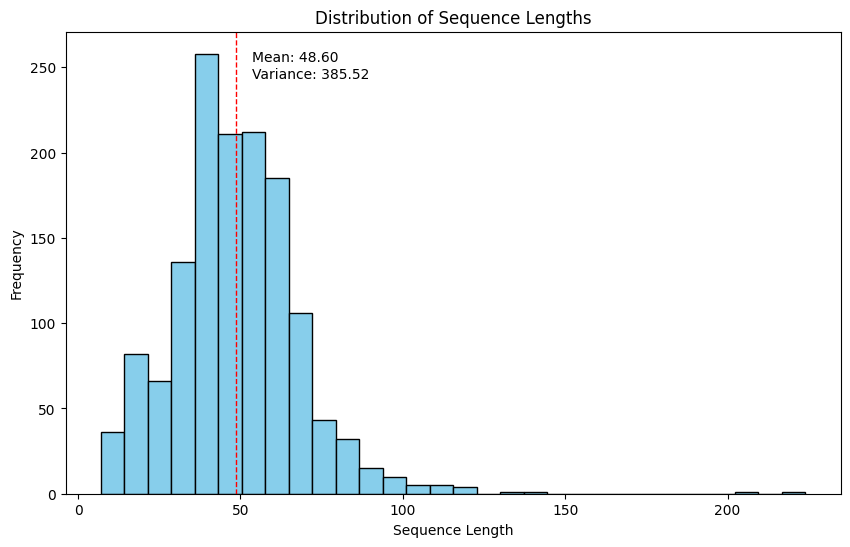

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the lengths of each list in the dictionary
lengths = [len(chords) for chords in chord_sequences.values()]

# Calculate mean and variance
mean_length = np.mean(lengths)
variance_length = np.var(lengths)

# Plotting the distribution of sequence lengths
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean_length*1.1, max_ylim*0.9, f'Mean: {mean_length:.2f}\nVariance: {variance_length:.2f}')

plt.show()


In [ ]:
# Calculate the lengths of each sequence
sequence_lengths = {key: len(value) for key, value in chord_sequences.items()}

# Sort the dictionary by sequence length in descending order and get the top 50
top_50_sequences = sorted(sequence_lengths.items(), key=lambda x: x[1], reverse=True)[:50]

# Print the top 50 keys and their corresponding sequence lengths
for key, length in top_50_sequences:
    print(f"{key}: {length}")

Seven Come Eleven: 224
Goodbye Pork Pie Hat: 203
Intrepid Fox, The: 142
Best Is Yet To Come (Page 1), The: 131
Don't Know Why: 121
One For My Baby: 121
Ecaroh: 120
Midnight Blue: 118
Tell Me A Bedtime Story: 114
James: 113
La Fiesta: 112
Anything Goes: 110
Lush Life: 109
Bess You Is My Woman: 107
I Feel Pretty: 105
Cute: 104
Begin The Beguine: 102
Fascinating Rhythm: 102
Over The Rainbow (Somewhere): 101
I Believe In You: 100
You Make Me Feel So Young: 99
Lakes: 97
My Song: 96
Round Midnight: 96
Spring Can Really Hang You Up The Most: 96
It Might As Well Be Spring: 95
Masquerade Is Over, The: 94
Ruby, My Dear: 94
A Ballad: 93
Bud Powell: 93
Brazil (Aquarela Do Brasil): 92
Cheek To Cheek: 92
It's All Right With Me: 92
Beyond The Sea: 91
How Long Has This Been Going On?: 91
I Get Along Without You: 91
Look To The Rainbow: 91
I Won't Dance: 90
Moanin': 90
Folks Who Live On The Hill, The: 89
Skating In Central Park: 89
Lone Jack (Page 1): 88
If I Ruled The World: 87
Country: 86
Some Enchan

In [ ]:
# Tokenization
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


1

In [ ]:
# Model Configuration and Initialization
config = GPT2Config(
  vocab_size=len(tokenizer),
  n_positions=1024,
  n_ctx=1024,
  n_embd=768,
  n_layer=12,
  n_head=12,
)

model = GPT2LMHeadModel(config)

In [ ]:
# Training
train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="chord_sequences.txt",
    block_size=128
)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

training_args = TrainingArguments(
    output_dir="./GPT2_chord_gen",
    overwrite_output_dir=True,
    num_train_epochs=5,
    per_device_train_batch_size=4,
    save_steps=10_000,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


Step,Training Loss
500,2.131800
1000,1.624900
1500,1.482600
2000,1.375200
2500,1.289600
3000,1.226800
3500,1.187700
4000,1.160900
4500,1.131800
5000,1.111800


Step,Training Loss
500,2.131800
1000,1.624900
1500,1.482600
2000,1.375200
2500,1.289600
3000,1.226800
3500,1.187700
4000,1.160900
4500,1.131800
5000,1.111800


TrainOutput(global_step=24170, training_loss=1.006340424581456, metrics={'train_runtime': 4345.9276, 'train_samples_per_second': 22.245, 'train_steps_per_second': 5.562, 'total_flos': 6315101798400000.0, 'train_loss': 1.006340424581456, 'epoch': 5.0})

In [ ]:
import torch

# Assuming you're using a GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

# Generation
model.eval()
prompt = "Eb-7 Ab7"  # Example starting chords
inputs = tokenizer.encode(prompt, return_tensors="pt").to(device)
attention_mask = torch.ones(inputs.shape, dtype=torch.long, device=device)  # Create an attention mask

outputs = model.generate(inputs, attention_mask=attention_mask, max_length=50, num_return_sequences=5, num_beams=5)

print("Generated Sequences:")
for output in outputs:
    print(tokenizer.decode(output))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Sequences:
Eb-7 Ab7 Db^7 Bb-7 Eb-7 Ab7 Db^7 Bb-7 Eb-7 Ab7 Db^7 Bb-7 Eb-7 Ab7 Db^7 B
Eb-7 Ab7 Db^7 Gb7 F-7 Bb7 Eb-7 Ab7 Db^7 Gb7 F-7 Bb7 Eb-7 Ab7 Db^7 Gb7 F
Eb-7 Ab7 Db^7 Bb-7 Eb-7 Ab7 Db^7 Bb-7 Eb-7 Ab7 Db^7 Bb-7 Eb-7 Ab7 F-7 Bb
Eb-7 Ab7 Db^7 Bb-7 Eb-7 Ab7 F-7 Bb7 Eb-7 Ab7 Db^7 Bb-7 Eb-7 Ab7 Db^7 Bb-
Eb-7 Ab7 Db^7 Bb-7 Eb-7 Ab7 Db^7 Bb-7 Eb-7 Ab7 Db^7 Bb-7 Eb-7 Ab7 Db^7 D
